[./Group C DB/Level 2/] Total 23 Files (5 cols x 5 rows)
......
L241-123x66.bmp
L242-526X294.bmp
L243-1000x500.bmp
L244-1024x768.bmp
L245-980X765.bmp
L246-1024×768.bmp


Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\users\00zh0\appdata\local\programs\python\python37\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-5-6fc0a623e525>", line 308, in <lambda>
    imageP_b = Button(root,text="Start", command = lambda:imageP(directory, name1, name2)).grid(row=6, column =1)
  File "<ipython-input-5-6fc0a623e525>", line 135, in imageP
    ax.imshow(img[i-1],'gray')
  File "c:\users\00zh0\appdata\local\programs\python\python37\lib\site-packages\matplotlib\__init__.py", line 1601, in inner
    return func(ax, *map(sanitize_sequence, args), **kwargs)
  File "c:\users\00zh0\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\deprecation.py", line 369, in wrapper
    return func(*args, **kwargs)
  File "c:\users\00zh0\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\deprecation.py", line 369, in wrapper
    return func(*args, **kwargs)
  Fil

[./Group C DB/Level 2/] Total 23 Files (5 cols x 5 rows)
......
L241-123x66.bmp
L242-526X294.bmp
L243-1000x500.bmp
L244-1024x768.bmp
L245-980X765.bmp
L246-1024x768.bmp
L247-7300X3183.bmp
L248-1021x525.bmp
L249-1000x525.bmp
L250-913x525.bmp
L251-479x230.bmp
L261-2000X1000.bmp
L262-980X765.bmp
L263-1562X683.bmp
L264-470X240.bmp.bmp
L265-980x765.bmp
L266-980x765.bmp
L267-720x480.bmp
L268-519x242.bmp
L269-519x205.bmp
L270-132x48.bmp
L271-519x273.bmp
L272-454x219.bmp
......
......
......
......
......
0.9565217391304348
[./Group C DB/Level 3/] Total 24 Files (5 cols x 5 rows)
......
L301-2320x1196.bmp
L302-2324x1232.bmp
L303-2337x1237.bmp
L304-1500X750.bmp
L305-980X765.bmp
L306-1331X709.bmp
L307-472X238.bmp.bmp
L308-980x765.bmp
L309--980x765.bmp
L310-720x480.bmp
L311-132x48.bmp
L312-456x227.bmp
L321-515x205.bmp
L322-500x274.bmp
L323-495x250.bmp
L324-2000X1000.bmp
L325-980X765.bmp
L326-1303X600.bmp
L327-477X225.bmp.bmp
L328-980x765.bmp
L329-980x765.bmp
L330-720x480.bmp
L331-132x48.bmp
L332-4

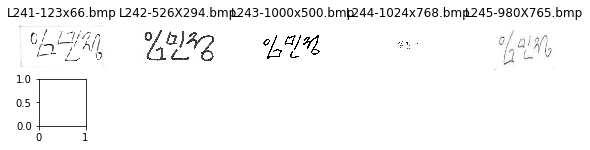

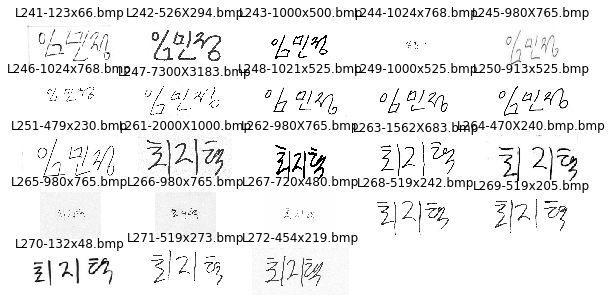

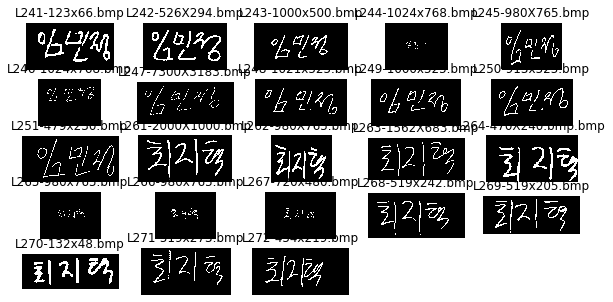

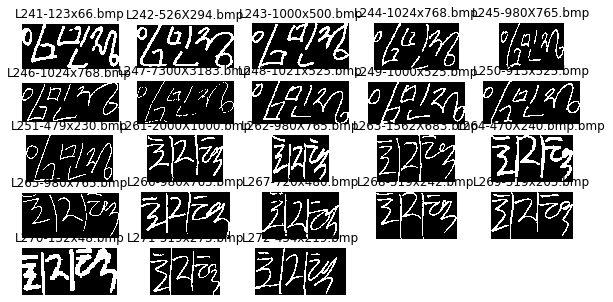

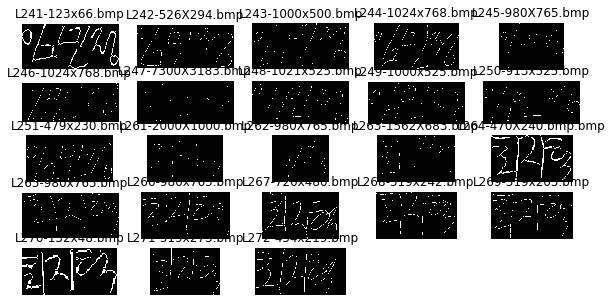

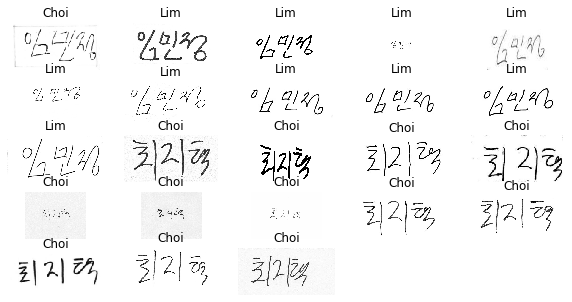

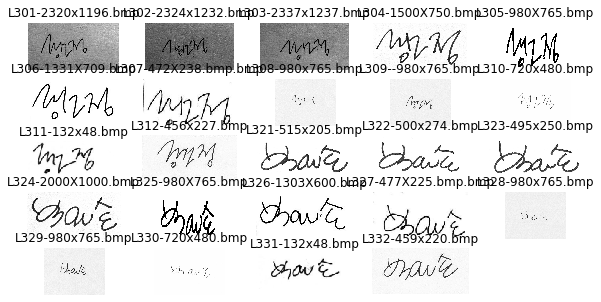

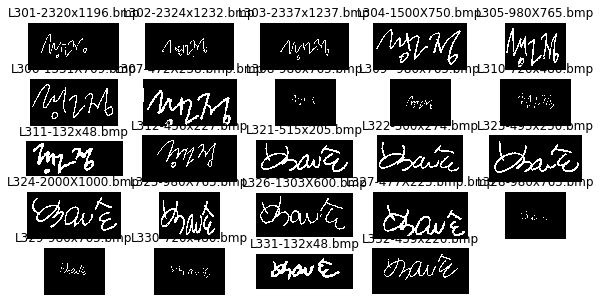

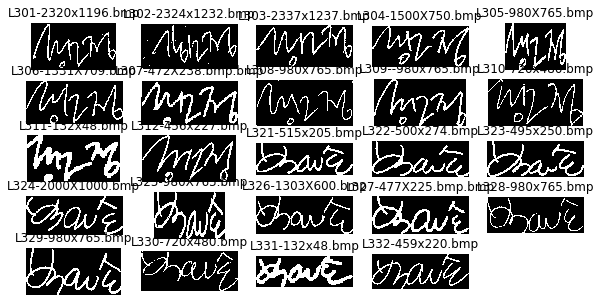

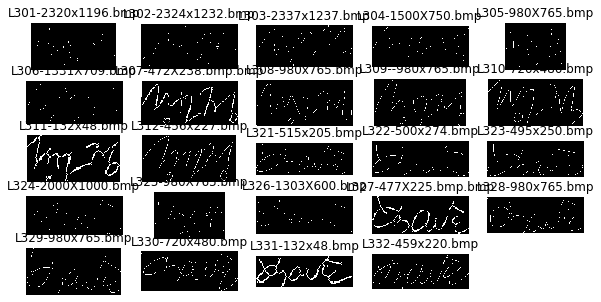

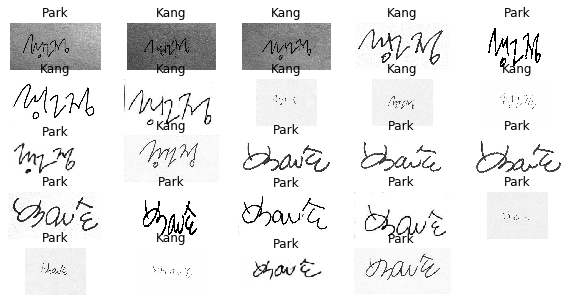

In [5]:
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt
import pandas as pd
import math

import PIL
from PIL import ImageTk
from PIL import Image
from tkinter import * 
from tkinter.filedialog import *
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure

########################## 경로상에 한글있으면 안됨

root = Tk()
root.title("Offline Signature Verification")

def loading():
    var = IntVar()
    root.after(700, var.set, 1)
    print("......")
    root.wait_variable(var)
    
def setV(v):
    v = v.get()
    print(v)
    
#--------------------------------------------------------------#
#-------------- Functions For Image Processing ----------------#
def crop_image(img,tol=0):
    # img is image data
    # tol  is tolerance
    mask = img>tol
    return img[np.ix_(mask.any(1),mask.any(0))]

def thinning(img):
    #img = cimg
    size = np.size(img)
    skel = np.zeros(img.shape,np.uint8)

    ret,img = cv2.threshold(img,127,255,0)
    element = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
    done = False

    while( not done):
        eroded = cv2.erode(img,element)
        temp = cv2.dilate(eroded,element)
        temp = cv2.subtract(img,temp)
        skel = cv2.bitwise_or(skel,temp)
        img = eroded.copy()

        zeros = size - cv2.countNonZero(img)
        if zeros==size:
            done = True
    return skel

# Find Centre of gravity of each sub-image
def COG(img):
    x_cor=0
    xrun_sum=0
    y_cor=0
    yrun_sum=0
    #print(img.shape)
    for i in range(img.shape[0]):
        x_cor+=sum(img[i])*i/255
        xrun_sum+=sum(img[i])/255

    for i in range(img.shape[1]):
        y_cor+=sum(img[:,i])*i/255
        yrun_sum+=sum(img[:,i])/255
        #print(img.shape[1]) 
        if yrun_sum==0:
            x_pos=0
        else:
            x_pos=y_cor/(yrun_sum)
        if xrun_sum==0:
            y_pos=0
        else:
            y_pos=x_cor/(xrun_sum)
    
    return (x_pos/img.shape[1],y_pos/img.shape[0])

def coords(timg):
    rows,cols=timg.shape
    img_tl = timg[0:int(rows/2),0:int(cols/2)]
    img_tr = timg[int(rows/2)+1:rows,0:int(cols/2)]
    img_bl = timg[0:int(rows/2),int(cols/2)+1:cols]
    img_br = timg[int(rows/2)+1:rows,int(cols/2)+1:cols]
    
    tl_x,tl_y=COG(img_tl)
    tr_x,tr_y=COG(img_tr)
    bl_x,bl_y=COG(img_bl)
    br_x,br_y=COG(img_br)

    return tl_x,tl_y,tr_x,tr_y,bl_x,bl_y,br_x,br_y
#--------------------------------------------------------------#

def imageP(directory, name1, name2):
    if len(directory.get()) > 0 and len(name1.get()) > 0 and len(name2.get()) > 0:
        
        directory = directory.get()
        name1 = name1.get()
        name2 = name2.get()
        
        try: file_list = os.listdir(directory)
        except FileNotFoundError: Label(root,text="지정된 경로를 찾을 수 없습니다. 다시 시도해주세요!").grid(row=4)
        
        file_count = len(file_list)
        col = 5
        row = file_count//col + 1
        print("[{}] Total {} Files ({} cols x {} rows)".format(directory, file_count, col, row))

        img = []
        image = []
        cimage = []
        timage = []
        
        
        # WARNING !!! 폴더 내 파일명 잘못 지정되어 있으면 안됨 ㅜ.ㅜ...
        #--------------------------------------------------------------#
        #--------------------보여주기용 이미지 로딩--------------------#
        # -- 1. Original
        loading()
        fig = plt.figure(figsize=(10,5))
        i = 1

        for file in file_list:
            if file.find('.bmp') or file.find('.jpg') != -1:
                print(file) # Image Reading Error 처리 위해 로그 출력
                img.append(cv2.imread(directory+file, 0))
                ax = fig.add_subplot(row, col, i)
                ax.imshow(img[i-1],'gray')
                ax.set_title(file)
                ax.axis("off")
                i+=1
        canvas = FigureCanvasTkAgg(fig, root).get_tk_widget().grid(row=6)
        Label(root,text=".Processing.").grid(row=3, column=0)
        loading()
        
        # -- 2. Binarization
        fig = plt.figure(figsize=(10, 5))
        i = 1
        for file in file_list:
            if file.find('.bmp') or file.find('.jpg') != -1:
                blur = cv2.GaussianBlur(img[i-1],(5,5),0)
                ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
                image.append(np.invert(th3))
                ax = fig.add_subplot(row, col, i)
                ax.imshow(image[i-1],'gray')
                ax.set_title(file)
                ax.axis("off")
                i+=1
        canvas = FigureCanvasTkAgg(fig, root).get_tk_widget().grid(row=6)
        Label(root,text="..Processing..").grid(row=3, column=0)
        loading()
        
        # -- 3. Crop
        fig = plt.figure(figsize=(10,5))
        i = 1
        for file in file_list:
            if file.find('.bmp') or file.find('.jpg') != -1:
                cimage.append(crop_image(image[i-1], tol=0))
                ax = fig.add_subplot(row, col, i)
                ax.imshow(cimage[i-1],'gray')
                ax.set_title(file)
                ax.axis("off")
                i+=1
        canvas = FigureCanvasTkAgg(fig, root).get_tk_widget().grid(row=6)
        Label(root,text="...Processing...").grid(row=3, column=0)
        loading()
        
        # -- 4. Thinning
        Label(root,text=".Processing.").grid(row=3, column=0)
        fig = plt.figure(figsize=(10,5))
        i = 1
        for file in file_list:
            if file.find('.bmp') or file.find('.jpg') != -1:
                timage.append(thinning(cimage[i-1]))
                ax = fig.add_subplot(row, col, i)
                ax.imshow(timage[i-1],'gray')
                ax.set_title(file)
                ax.axis("off")
                i+=1
        canvas = FigureCanvasTkAgg(fig, root).get_tk_widget().grid(row=6)
        
        #--------------------------------------------------------------#
        loading()
        Label(root,text="..Processing..").grid(row=3, column=0)
        data=[]
        i = 1
        for file in file_list:
            if file.find('.bmp') or file.find('.jpg') != -1:

                # binarization
                oimg = cv2.imread(directory+file,0)
                blur = cv2.GaussianBlur(oimg,(5,5),0)
                ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
                image=np.invert(th3)

                #crop
                cimg=crop_image(image,tol=0)
                # area=cv2.countNonZero(cimg)/(cimg.shape[0]*cimg.shape[1])

                #Thinning the image
                timg=thinning(cimg)

                # Divide into 4 parts and get coordiate of each COG (Extracting features)
                tl_x,tl_y,tr_x,tr_y,bl_x,bl_y,br_x,br_y=coords(timg)

                ### put area and cc if you want
                x=pd.Series([file,tl_x,tl_y,tr_x,tr_y,bl_x,bl_y,br_x,br_y],index=
                            ["File","tl_x","tl_y","tr_x","tr_y","bl_x","bl_y","br_x","br_y"])
                data.append(x)
                i+=1
        df=pd.DataFrame(data)
        
        
        xtl = df["tl_x"]
        ytl = df["tl_y"]
        xtr = df["tr_x"]
        ytr = df["tr_y"]
        xbl = df["bl_x"]
        ybl = df["bl_y"]
        xbr = df["br_x"]
        ybr = df["br_y"]

        # find out whether corresponding coordinate belongs to name1 or name2
        # name1: return 1, name2: return -1
        def whether (coor):
            result = []
            for i in coor:
                if abs(i-coor[0:file_count//2].mean()) < abs(i-coor[file_count//2:].mean()): result.append(1)
                else: result.append(-1)
            return result

        xtl_result = whether(xtl)
        xtr_result = whether(xtr)
        xbl_result = whether(xbl)
        xbr_result = whether(xbr)
        ytl_result = whether(ytl)
        ytr_result = whether(ytr)
        ybl_result = whether(ybl)
        ybr_result = whether(ybr)
        
        
        final_result = [] # total result(avg. of results) of each images 
        i = 0
        for file in file_list:
            coor_sum = xtl_result[i] + xtr_result[i] + xbl_result[i] + xbr_result[i] \
                     + ytl_result[i] + ytr_result[i] + ybl_result[i] + ybr_result[i]

            # if total result(avg. of results) is >0, it's name1
            # else: name2
            if coor_sum/8 > 0: final_result.append(name1)
            else: final_result.append(name2)
            #print("{:<20} >>  {} : {}".format(file, final_result[i], coor_sum/8))
            i+=1

            
        fig = plt.figure(figsize=(10,5))
        i = 1
        for file in file_list:
            if file.find('.bmp') or file.find('.jpg') != -1:
                ax = fig.add_subplot(row, col, i)
                ax.imshow(img[i-1],'gray')
                ax.set_title(final_result[i-1])
                ax.axis("off")
                i+=1
        canvas = FigureCanvasTkAgg(fig, root).get_tk_widget().grid(row=6)
        Label(root,text=">> Processed Results <<").grid(row=3, column=0)
        
        loading()
        Label(root, text="올바른 개수는?").grid(row= 4, column =0)
        total = StringVar()
        Entry(root, textvariable = total).grid(row=4, column =1)
        Label(root, text="인식율:").grid(row=5,column=0)
        def calc_f(f):
            f = f.get()
            result = int(f)/file_count
            print(result)
            Label(root, text="인식율: "+str(result)).grid(row=5,column=0)
        total_b = Button(root, text = "Enter", command = lambda:calc_f(total)).grid(row=4, column =2)

            
        
    else: Label(root,text="Please Enter All !!").grid(row=4)



Label(root, text=">>> 서명 이미지가 존재하는 폴더를 입력하세요... ex) ./data/Level 1/\n\
(※ 절대경로X 한글포함X. 실행파일 내 data폴더. 입력 시 /로 끝나야함").grid(row=0, column = 0)
directory = StringVar()
directory_e = Entry(root, textvariable = directory).grid(row = 0, column = 1)
directory_b = Button(root, text="Enter", command = lambda:setV(directory)).grid(row=0,column=2)


Label(root,text=">>> 두 서명인의 이름을 영어로 입력해 주십시오 (한글은 깨짐)\n\
(※반드시 디렉토리 내 서명이미지 묶음 순서대로)").grid(row=2, column=0)
name1 = StringVar()
name1_e = Entry(root, textvariable = name1).grid(row=2, column = 1)
name1_b = Button(root, text="Enter", command = lambda:setV(name1)).grid(row=2, column=2)
name2 = StringVar()
name2_e = Entry(root, textvariable = name2).grid(row=3, column = 1)
name2_b = Button(root, text="Enter", command = lambda:setV(name2)).grid(row=3, column=2)
imageP_b = Button(root,text="Start", command = lambda:imageP(directory, name1, name2)).grid(row=6, column =1)

root.mainloop()